## Studio Quantitativo

Per effettuare lo studio quantitativo si utilizzerà l'**indice di Jaccard**, che misura la similarità tra insiemi campionari, ed è definito come la dimensione dell'intersezione divisa per la dimensione dell'unione degli insiemi campionari.<br><br>

<center>$J(A,B)={{|A\cap B|} \over {|A\cup B|}}$</center>

Supponiamo di avere la seguente etichettatura per un'azione di *PUSH*:

<img src="Immagini/13.png">

dove:

- $x_{11}$ rappresenta l'inizio dell'etichetta automatica;
- $x_{12}$ rappresenta la fine dell'etichetta automatica;
- $x_{21}$ rappresenta l'inizio dell'etichetta manuale;
- $x_{22}$ rappresenta la fine dell'etichetta manuale.

L'intersezione (I) e l'unione (U) possono essere definite come segue:<br><br>

<center>
    $I = \min(x_{1,2}, x_{2,2}) - \max(x_{1,1} - x_{2,1})$<br><br>
    $U = \max(x_{1,2}, x_{2,2}) - \min(x_{1,1} - x_{2,1})$
</center>

Allora:<br><br>

<center>$J(Premi_A, Premi_M)={{|Premi_A\cap Premi_M|} \over {|Premi_A\cup Premi_M|}}=$</center><br>
<center>$={{I} \over {U}}=$</center><br>
<center>$={{\min(x_{1,2}, x_{2,2}) - \max(x_{1,1} - x_{2,1})} \over {\max(x_{1,2}, x_{2,2}) - \min(x_{1,1} - x_{2,1})}}$</center>

Adesso, possiamo calcolare la similarità tra tutte le etichette automatiche e quelle manuali.

In [1]:
import json
from modules.extract_json import ExtractJSON

js = json.loads(
    ExtractJSON.get_json(
        "via_qualitative_study.json"
    )
)
js

{'project': {'pid': '__VIA_PROJECT_ID__',
  'rev': '__VIA_PROJECT_REV_ID__',
  'rev_timestamp': '__VIA_PROJECT_REV_TIMESTAMP__',
  'pname': '001_Ripresa',
  'creator': 'VGG Image Annotator (http://www.robots.ox.ac.uk/~vgg/software/via)',
  'created': 1618820919692,
  'vid_list': ['1']},
 'config': {'file': {'loc_prefix': {'1': '', '2': '', '3': '', '4': ''}},
  'ui': {'file_content_align': 'center',
   'file_metadata_editor_visible': True,
   'spatial_metadata_editor_visible': True,
   'spatial_region_label_attribute_id': '',
   'gtimeline_visible_row_count': '4'}},
 'attribute': {'1': {'aname': 'Activity',
   'anchor_id': 'FILE1_Z2_XY0',
   'type': 1,
   'desc': 'Activity',
   'options': {},
   'default_option_id': ''}},
 'file': {'1': {'fid': '1',
   'fname': '/home/gigi-g/OneDrive/Tesi1/2021-04-07-00-48-37-381/2021-04-07-00-48-37-381_Video.mp4',
   'type': 4,
   'loc': 1,
   'src': ''}},
 'metadata': {'1_10000000': {'vid': 1,
   'flg': 0,
   'z': [11.831, 13.831],
   'xy': [],
   'a

In [2]:
metadata = js["metadata"]
print(f"In totale ci sono {len(metadata)} metadati.")

In totale ci sono 36 metadati.


Dei 36 elementi che costituiscono i metadati, a due a due essi rappresentano la stessa azione, solo che la prima ha un'etichetta manuale, mentre la seconda ha un'etichetta automatica. Gli elementi del dizionario che si riferiscono alla stessa azione possiedono la stessa **chiave** a meno del terzo carattere che è pari a `1` nel caso di etichetta automatica e `2` nel caso di etichetta manuale.

**Esempio:** 1_10000001 si riferisce alla stessa azione di 1_20000001.

In [3]:
metadata["1_10000001"]["av"]["1"][:-2] == metadata["1_20000001"]["av"]["1"][:-2]

True

La funzione `jaccard_similarity` permette di calcolare la similarità di Jaccard, come visto in precedenza.

In [4]:
def jaccard_similarity(x11, x12, x21, x22) -> float:
    I = min(x12, x22) - max(x11, x21)
    U = max(x12, x22) - min(x11, x21)
    return I/U

La funzione `similarity_dict` calcola la similarità di jaccard tra tutte le etichette automatiche e manuali e ritorna un dizionario così fatto:

- **key**: numero progressivo;
- **"Action"**: contiene il tipo di azione;
- **"similarity"**: contiene la similarità di jaccard.

In [5]:
def similarity_dict(metadata) -> dict:
    action = 0
    result = {}
    for key1, value in metadata.items():
        if action >= len(metadata) / 2: break
        #print(key1, value["av"]["1"], value["z"])
        # key2 è la chiave che identifica l'etichetta manuale
        key2 = list(key1)
        key2[2] = '2'
        key2 = ''.join(key2)
        #print(key2, metadata[key2]["av"]["1"], metadata[key2]["z"])
        result[key1] = {
            "action": value["av"]["1"][:-2],
            "similarity": jaccard_similarity(value["z"][0], value["z"][1], metadata[key2]["z"][0], metadata[key2]["z"][1])
        }
        action += 1
    return result

In [6]:
sim = similarity_dict(metadata)
sim

{'1_10000000': {'action': 'Prendi', 'similarity': 0.6038647342995167},
 '1_10000001': {'action': 'Prendi', 'similarity': 0.8650519031141864},
 '1_10000002': {'action': 'Rilascia', 'similarity': 0.37216226274655734},
 '1_10000003': {'action': 'Rilascia', 'similarity': 0.7070993914807296},
 '1_10000004': {'action': 'Premi', 'similarity': 0.842105263157895},
 '1_10000005': {'action': 'Prendi', 'similarity': 0.8620689655172413},
 '1_10000006': {'action': 'Prendi', 'similarity': 0.7500000000000008},
 '1_10000007': {'action': 'Rilascia', 'similarity': 0.8317757009345798},
 '1_10000008': {'action': 'Rilascia', 'similarity': 0.8771929824561426},
 '1_10000009': {'action': 'Premi', 'similarity': 0.6365688487584678},
 '1_10000010': {'action': 'Premi', 'similarity': 0.7142857142857147},
 '1_10000011': {'action': 'Prendi', 'similarity': 0.7480314960629967},
 '1_10000012': {'action': 'Rilascia', 'similarity': 0.9615384615384623},
 '1_10000013': {'action': 'Prendi', 'similarity': 0.7933884297520662},

A questo punto possiamo calcolare la media tra tutti i valori di similarità e la media per singola azione.

In [7]:
def mean(similarity, action = False) -> list:
    
    if not action:
        return [sum(value["similarity"] for value in similarity.values()) / len(similarity)]
    
    s_take = 0
    c_take = 0
    s_release = 0
    c_release = 0
    s_push = 0
    c_push = 0
    for _, value in similarity.items():
        if value["action"] == "Prendi":
            s_take += value["similarity"]
            c_take += 1
        elif value["action"] == "Rilascia":
            s_release += value["similarity"]
            c_release += 1
        else:
            s_push += value["similarity"]
            c_push += 1
    return [s_take/c_take, s_release/c_release, s_push/c_push]

In [8]:
mean(sim)

[0.762994519820559]

In [9]:
mean(sim, True)

[0.7824437690638374, 0.7670558146680972, 0.7218510676616299]

Quello che possiamo osservare è che: 

- La media tra tutte le similarità è pari a 0.762994519820559.
- La media tra le similarità delle azioni TAKE è pari a 0.7824437690638374.
- La media tra le similarità delle azioni REALEASE è pari a 0.7670558146680972
- La media tra le similarità delle azioni PUSH è pari a 0.7218510676616299

Osserviamo subito che la media risulta essere abbastanza alta e quindi le etichette automatiche e quelle manuali sono molto simili tra di loro.

Rappresentiamo i valori di similarità in un Box Plot. Per prima cosa estraiamo tutti i valori di similarità all'interno del vettore `similarities`.

In [10]:
similarities = []
for _, value in sim.items():
    similarities.append(value["similarity"])
similarities

[0.6038647342995167,
 0.8650519031141864,
 0.37216226274655734,
 0.7070993914807296,
 0.842105263157895,
 0.8620689655172413,
 0.7500000000000008,
 0.8317757009345798,
 0.8771929824561426,
 0.6365688487584678,
 0.7142857142857147,
 0.7480314960629967,
 0.9615384615384623,
 0.7933884297520662,
 0.8653846153846148,
 0.6944444444444421,
 0.8547008547008534,
 0.7542372881355939]

In [11]:
import matplotlib.pyplot as plt

def box_plot(data) -> None:
    green_diamond = dict(markerfacecolor='g', marker='D')
    fig1, ax1 = plt.subplots()
    ax1.set_title('Box Plot')
    ax1.boxplot(data, flierprops=green_diamond)
    plt.grid()

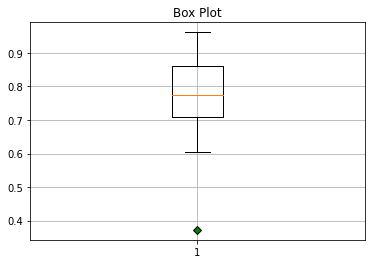

In [12]:
box_plot(similarities)

Dal Box Plot possiamo osservare che solo un valore di similarità risulta essere un outlier, ovvero un valore anomalo, quindi questo sarà l'errore di etichettatura automatica più grande. I restanti valori sono superiori a 0.6, che comunque è un buon risultato dato che la similarità di Jaccard è compresa nell'intervallo [0,1].

Rappresentiamo i valori di similarità in tre Box Plot, uno per ogni azione. Per prima cosa estraiamo i valori di similarità in 3 vettori distinti. 

In [13]:
sim_take = []
sim_release = []
sim_push = []
for _, value in sim.items():
    if value["action"] == "Prendi":
            sim_take.append(value["similarity"])
    elif value["action"] == "Rilascia":
        sim_release.append(value["similarity"])
    else:
        sim_push.append(value["similarity"])
print("TAKE:", sim_take, "\n")
print("RELEASE:", sim_release, "\n")
print("PUSH:", sim_push, "\n")

TAKE: [0.6038647342995167, 0.8650519031141864, 0.8620689655172413, 0.7500000000000008, 0.7480314960629967, 0.7933884297520662, 0.8547008547008534] 

RELEASE: [0.37216226274655734, 0.7070993914807296, 0.8317757009345798, 0.8771929824561426, 0.9615384615384623, 0.8653846153846148, 0.7542372881355939] 

PUSH: [0.842105263157895, 0.6365688487584678, 0.7142857142857147, 0.6944444444444421] 



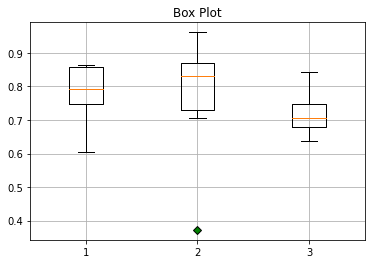

In [14]:
box_plot([sim_take, sim_release, sim_push])

### Conclusione

In questo secondo grafico possiamo osservare che l'outlier appartiene alle azioni di RELEASE. Dai tre Box Plot possiamo ricavare che i risultati di similarità tra le etichette automatiche e quelle manuali, nel video analizzato, hanno valori alti che ci permettono di confermare che anche attraverso uno studio quantitativo l'etichettatura automatica può essere accettata.